In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [14]:
load_path = r'../data/'

train_df = pd.read_csv(load_path + 'movies_train.csv')
test_df = pd.read_csv(load_path + 'movies_test.csv')

In [15]:
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [16]:
test_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


# Data Check

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# 결측치 제거
- 결측치가 많은 dir_prev_bfnum 열 제거

In [18]:
train_df.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [19]:
train_df[train_df['dir_prev_bfnum'].isna()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [20]:
train_df.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [21]:
drop_columns = ['dir_prev_bfnum']

train_df = train_df.drop(drop_columns, axis = 1)
test_df = test_df.drop(drop_columns, axis = 1)

In [22]:
train_df.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num'],
      dtype='object')

# 데이터 정리
- title: 의미가 없으므로 제거
- director: 너무 다양하므로 제거
- distributor: 상위 5개 제외 나머지 '기타'로 분류
- release_time: year, month 구분

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51137 (\N{HANGUL SYLLABLE JAENG}) m

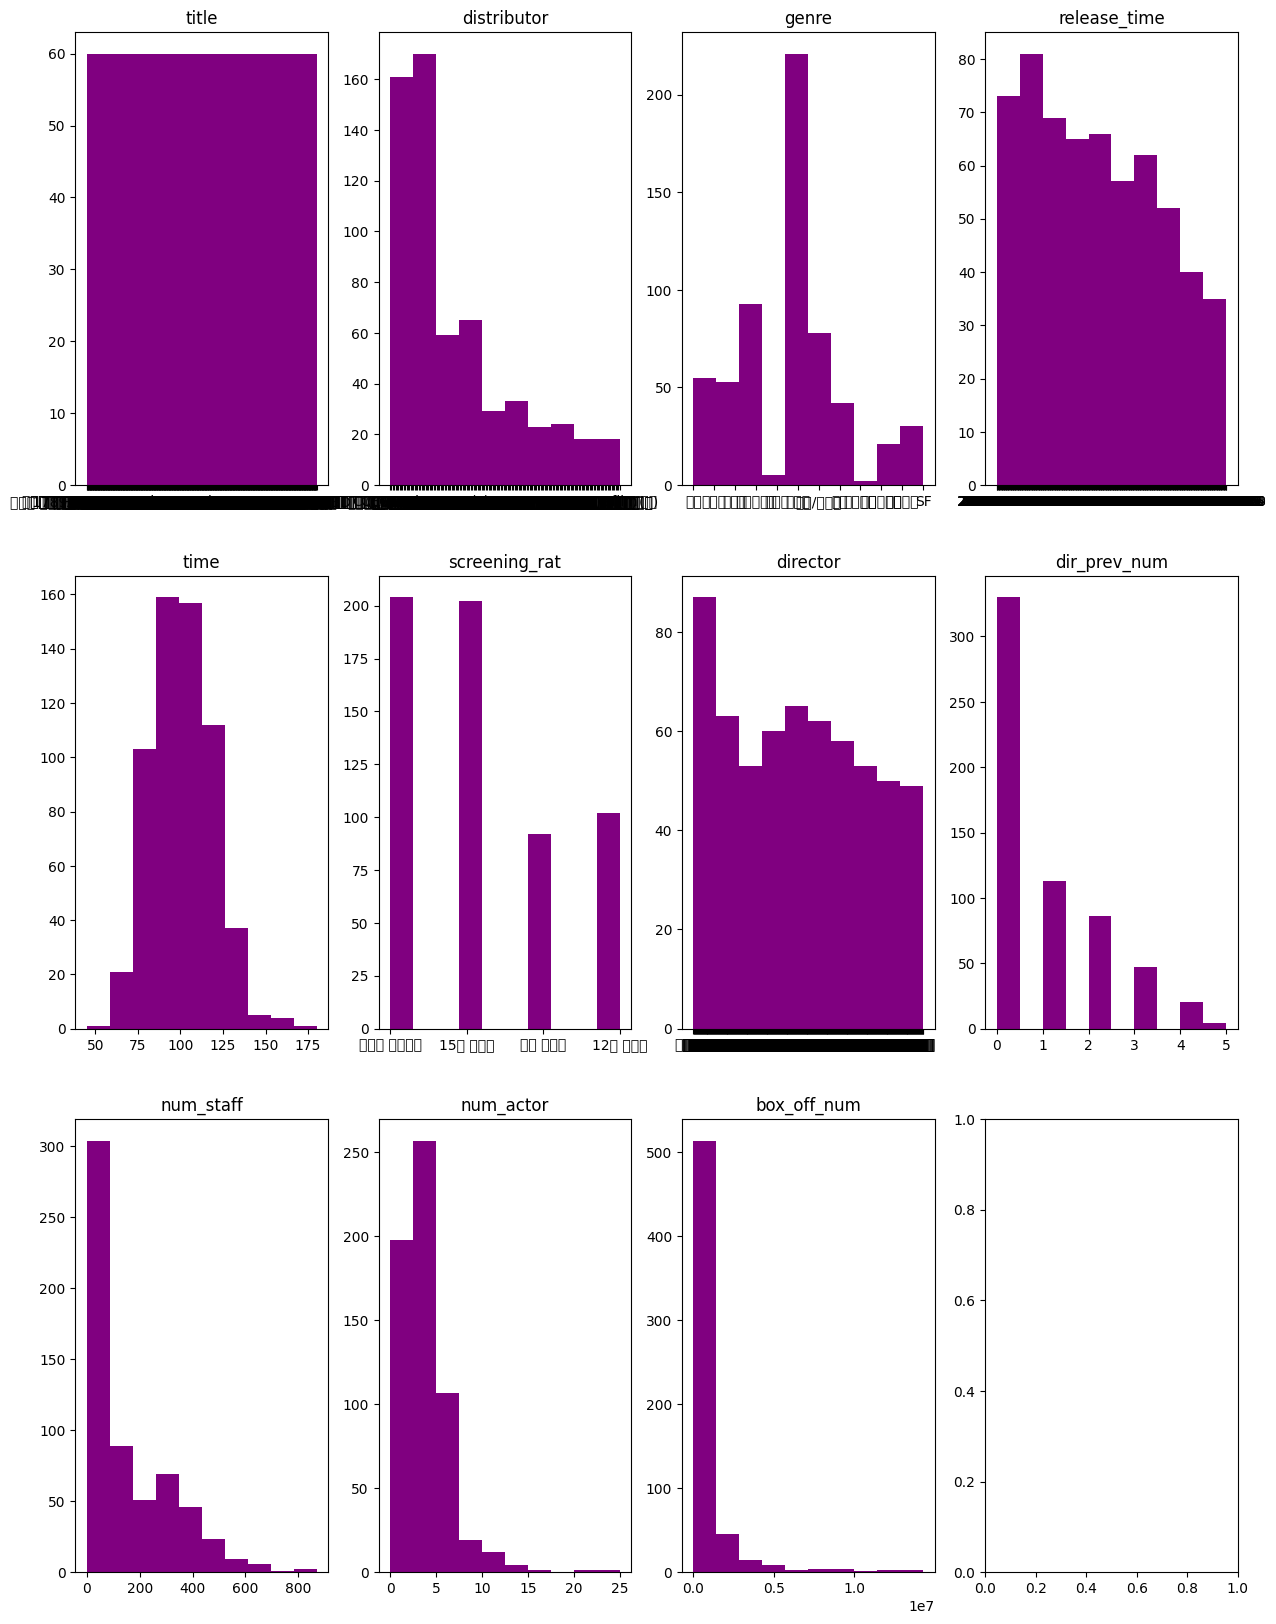

In [23]:
fig, axis = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 20))
axis = axis.flatten()

for i in range(len(train_df.columns)):
    axis[i].hist(train_df.iloc[:, i], color = 'purple')
    axis[i].set_title(train_df.columns[i])

plt.show()

<Figure size 640x480 with 0 Axes>

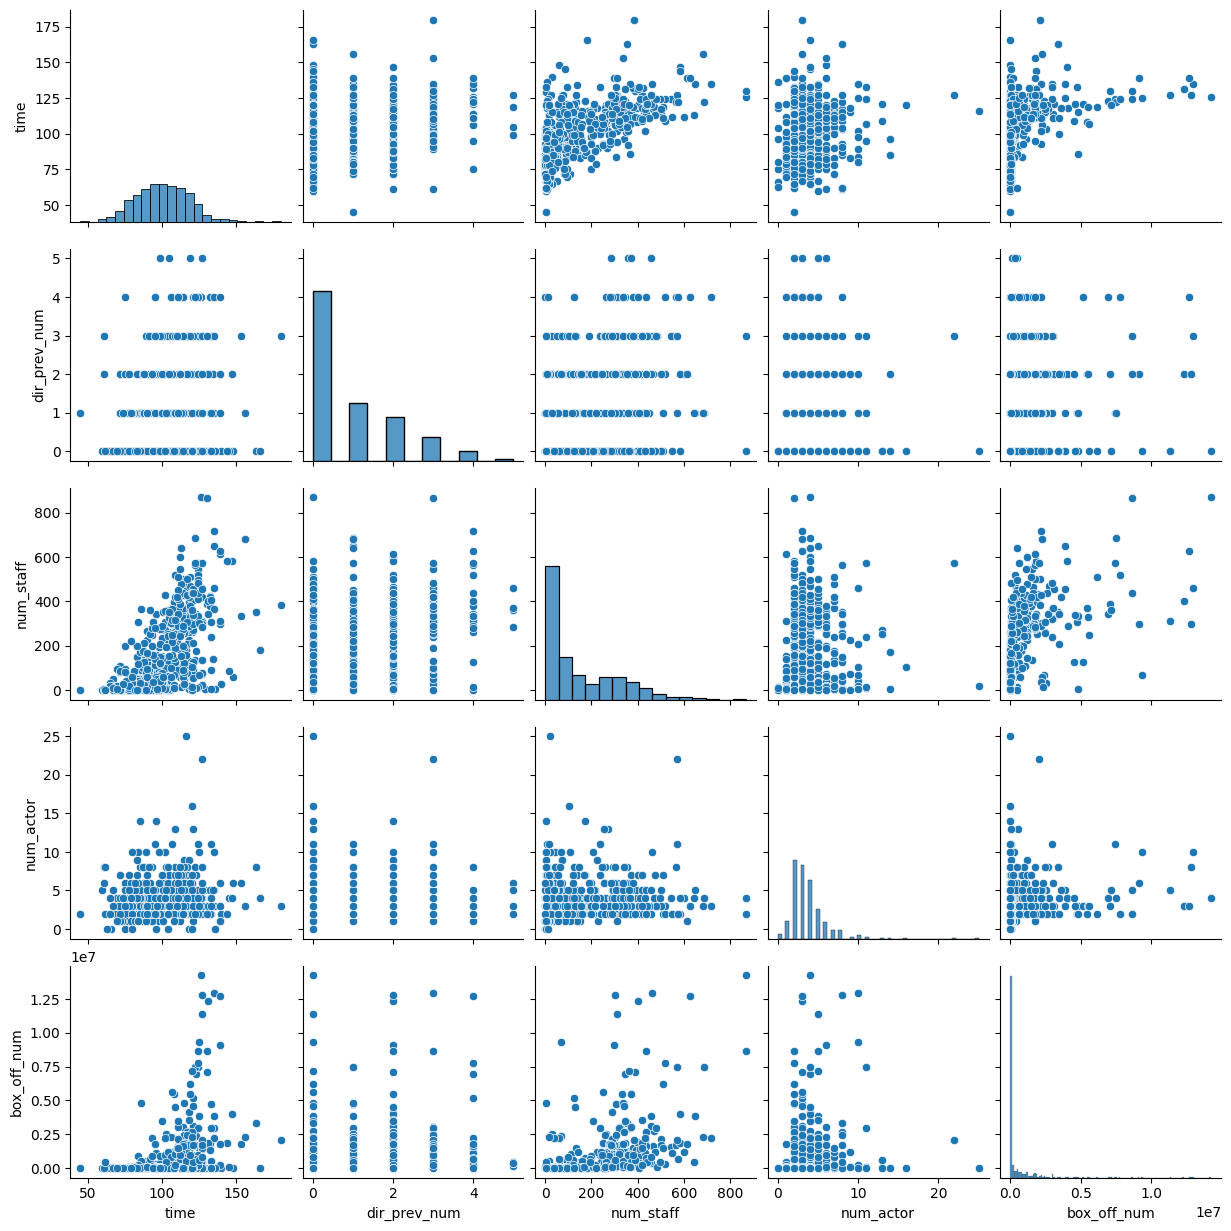

In [24]:
plt.figure()

sns.pairplot(train_df)

plt.show()

In [25]:
print(train_df['title'].unique().shape)
print(train_df['director'].unique().shape)
print(train_df['distributor'].unique().shape)

(600,)
(472,)
(169,)


In [26]:
train_df['director'].value_counts()

director
홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: count, Length: 472, dtype: int64

In [27]:
drop_columns = ['title', 'director']

train_df = train_df.drop(drop_columns, axis = 1)
test_df = test_df.drop(drop_columns, axis = 1)

In [28]:
train_df['distributor'].value_counts()

distributor
CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: count, Length: 169, dtype: int64

In [29]:
distributor_list = train_df['distributor'].value_counts()[:5]

def distributor_func(distributor_x):
    if distributor_x in distributor_list:
        return distributor_x
    else:
        return '기타'
    
train_df['distributor'] = train_df['distributor'].apply(distributor_func)
test_df['distributor'] = test_df['distributor'].apply(distributor_func)

In [30]:
train_df['year'] = train_df['release_time'].apply(lambda x: int(x[:4]))
train_df['month'] = train_df['release_time'].apply(lambda x: int(x[5:7]))
train_df = train_df.drop(['release_time'], axis = 1)

test_df['year'] = test_df['release_time'].apply(lambda x: int(x[:4]))
test_df['month'] = test_df['release_time'].apply(lambda x: int(x[5:7]))
test_df = test_df.drop(['release_time'], axis = 1)

In [31]:
train_df['year']

0      2012
1      2015
2      2013
3      2012
4      2010
       ... 
595    2014
596    2013
597    2010
598    2015
599    2013
Name: year, Length: 600, dtype: int64

In [32]:
train_df['genre'].value_counts()

genre
드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: count, dtype: int64

In [33]:
print(train_df.columns)
print(train_df.shape)

Index(['distributor', 'genre', 'time', 'screening_rat', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num', 'year', 'month'],
      dtype='object')
(600, 10)


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50644 (\N{HANGUL SYLLABLE EN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing

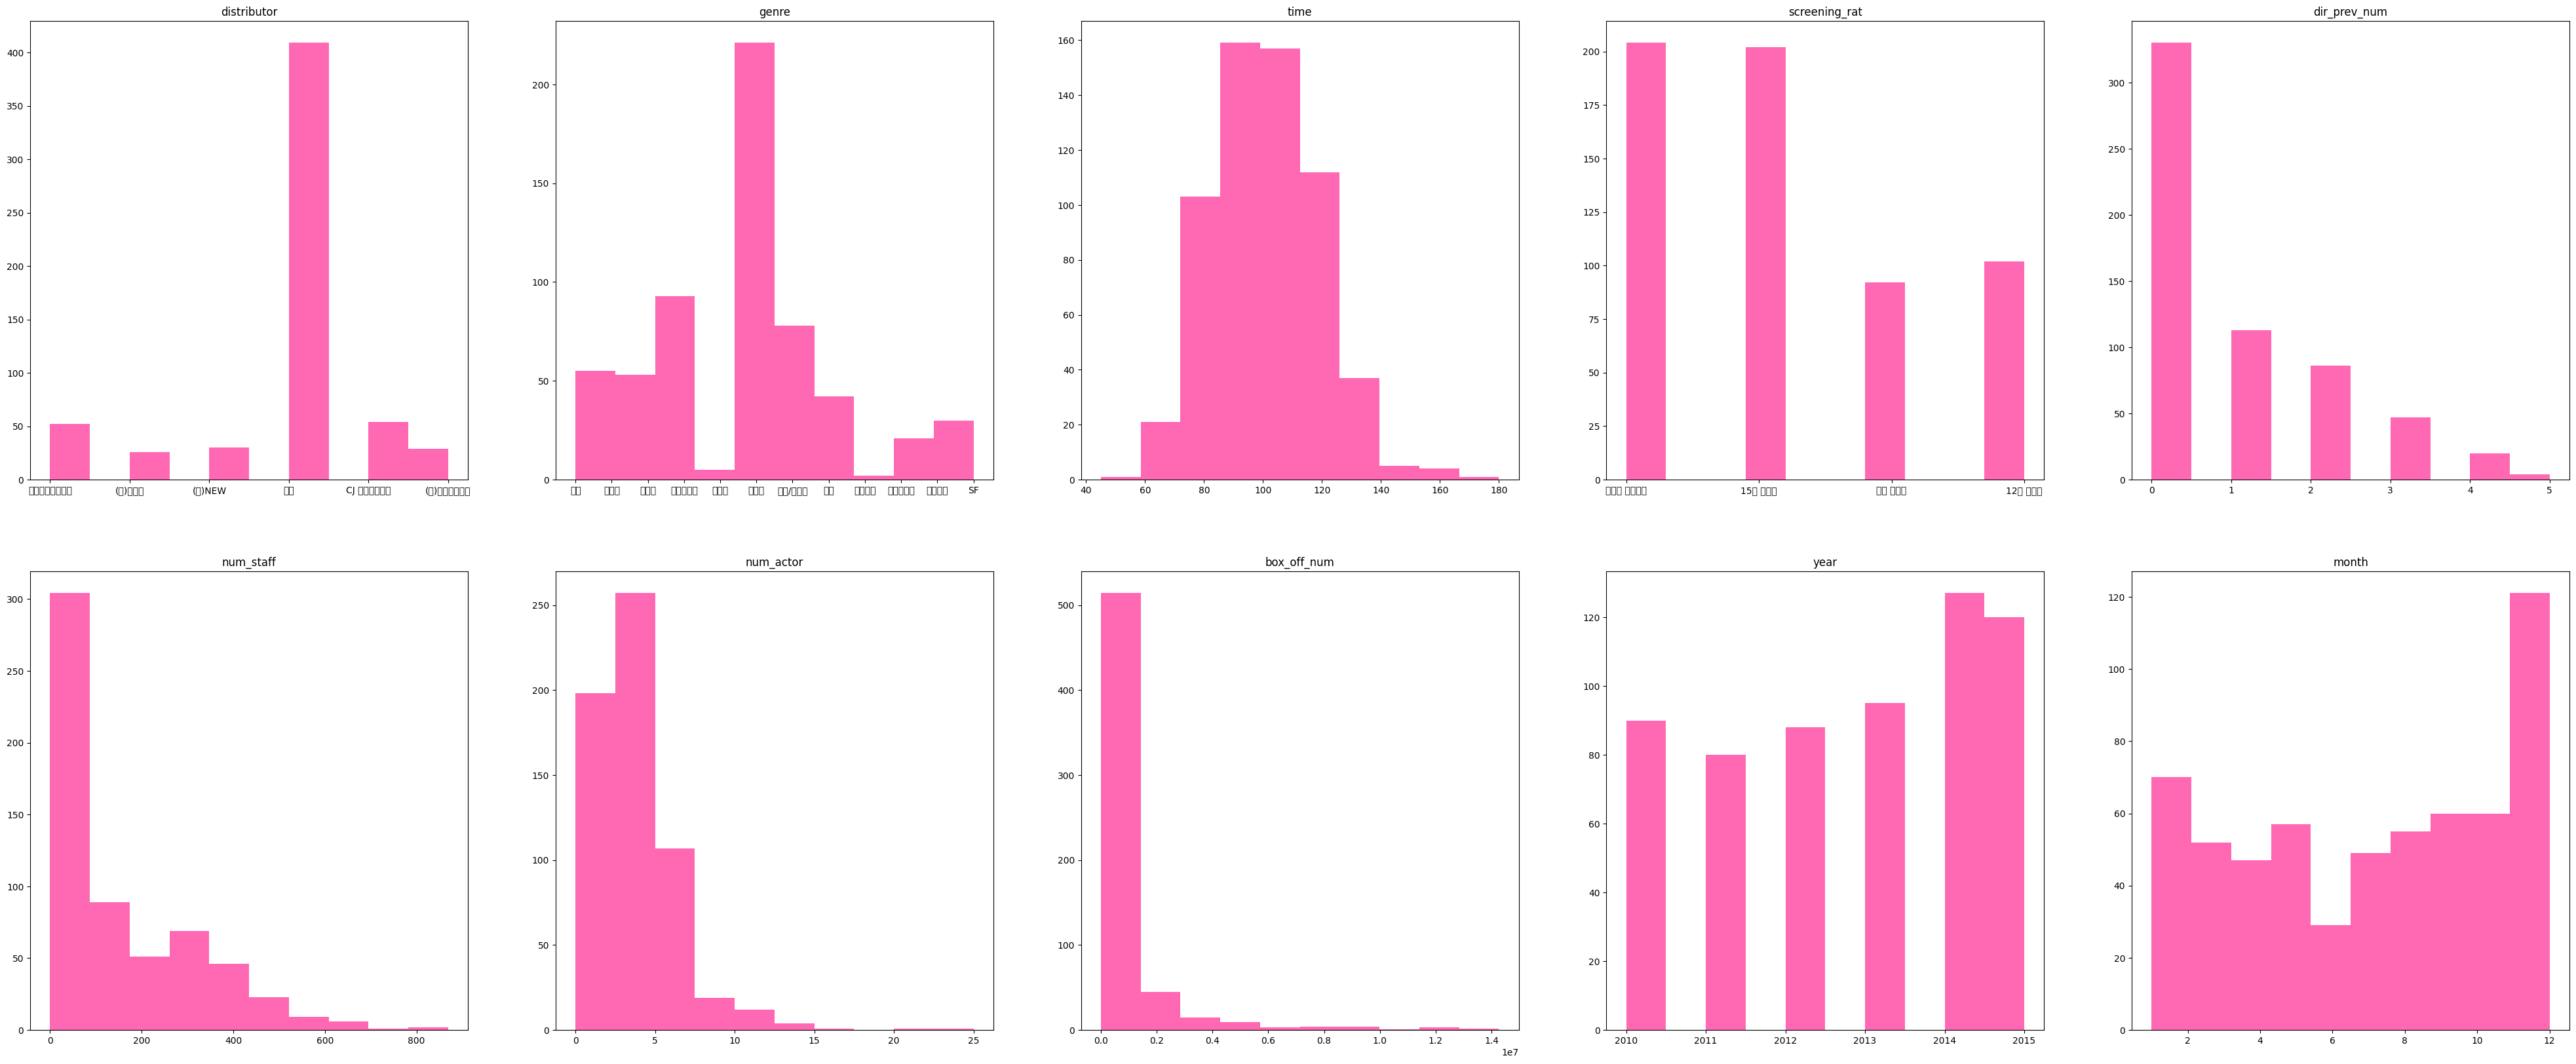

In [34]:
fig, axis = plt.subplots(nrows = 2, ncols = 5, figsize = (50, 20))
axis = axis.flatten()

for i in range(len(train_df.columns)):
    axis[i].hist(train_df.iloc[:, i], color = 'hotpink')
    axis[i].set_title(train_df.columns[i])

plt.show()

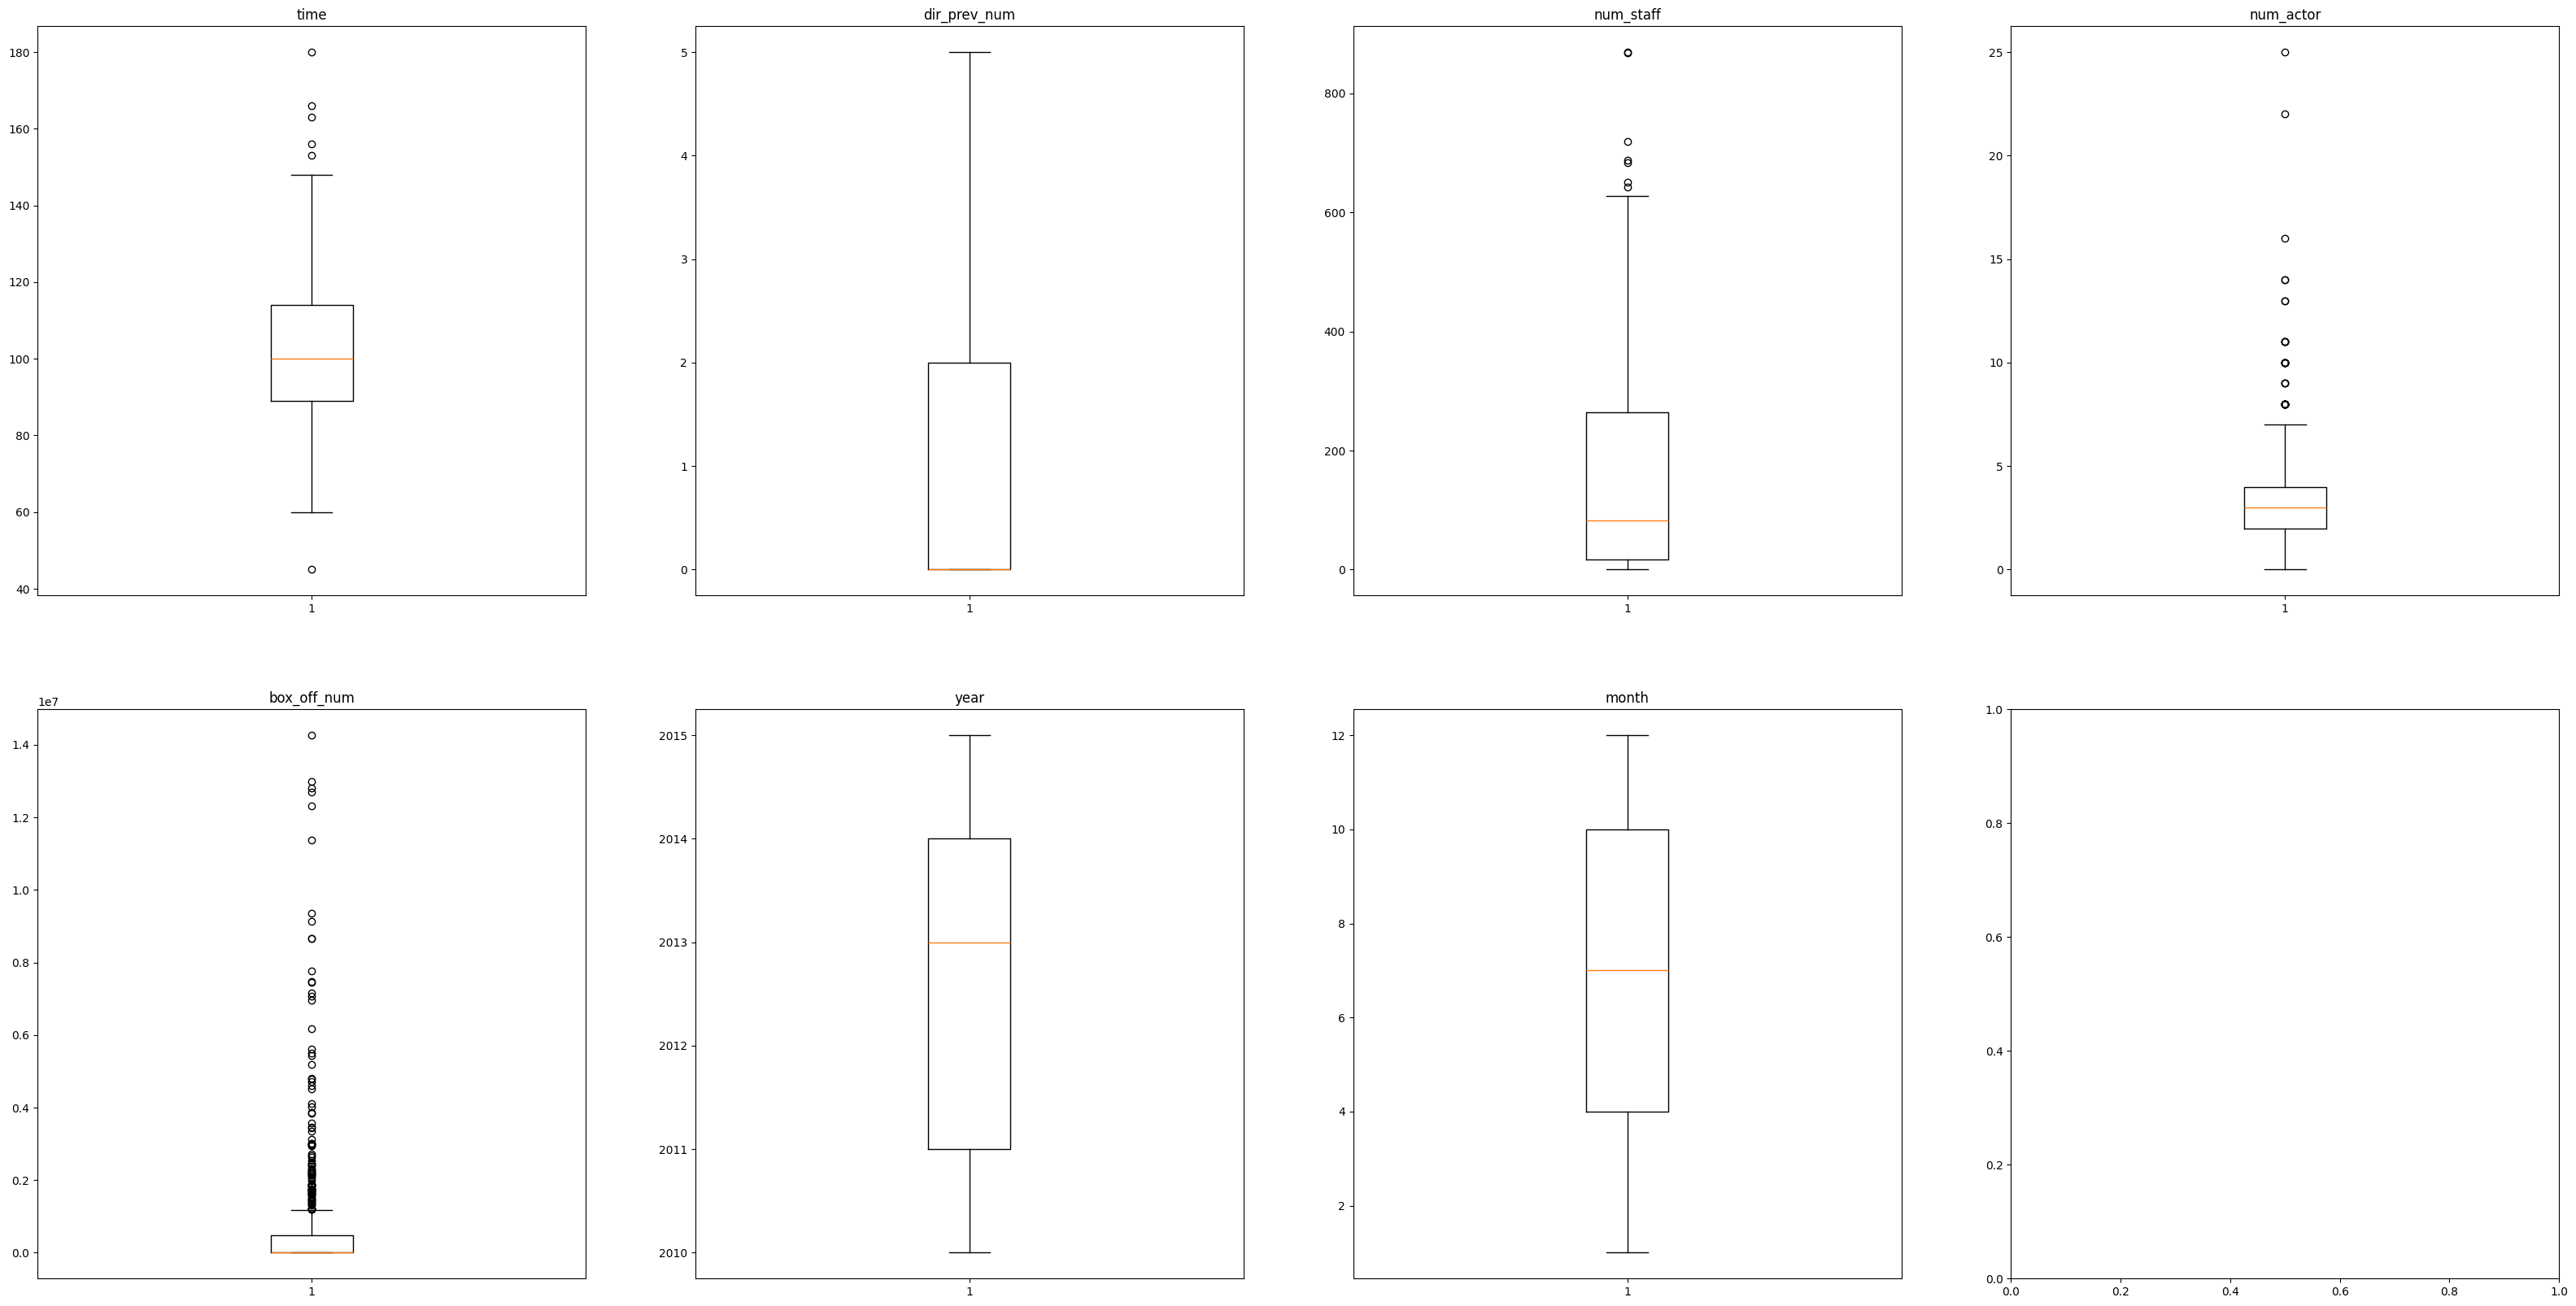

In [35]:
continues_columns = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num', 'year', 'month']
boxplot_train_df = train_df[continues_columns]

fig, axis = plt.subplots(nrows = 2, ncols = 4, figsize = (40, 20))
axis = axis.flatten()

for i in range(len(boxplot_train_df.columns)):
    axis[i].boxplot(boxplot_train_df.iloc[:, i])
    axis[i].set_title(boxplot_train_df.columns[i])

plt.show()

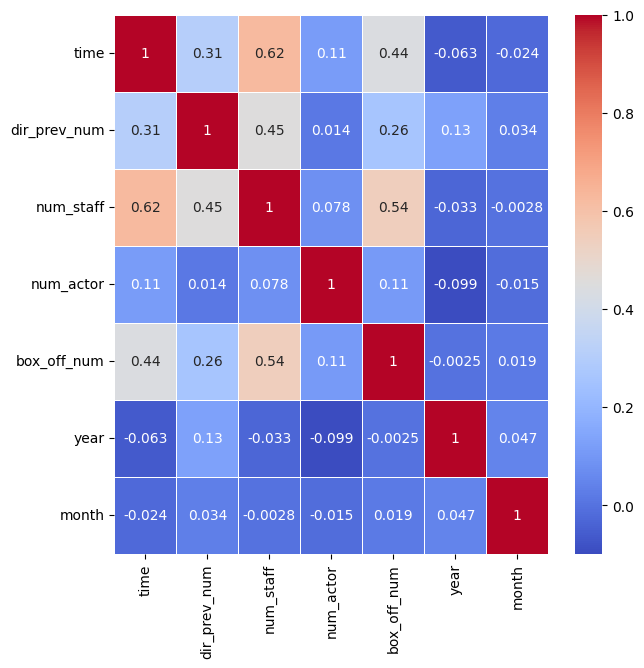

In [36]:
corr_matrix = train_df[continues_columns].corr()

plt.figure(figsize = (7, 7))

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)

plt.show()

In [37]:
train_df.head()

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398,2012,11
1,(주)쇼박스,느와르,130,청소년 관람불가,2,387,3,7072501,2015,11
2,(주)쇼박스,액션,123,15세 관람가,4,343,4,6959083,2013,6
3,(주)NEW,코미디,101,전체 관람가,2,20,6,217866,2012,7
4,기타,코미디,108,15세 관람가,1,251,2,483387,2010,11


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distributor    600 non-null    object
 1   genre          600 non-null    object
 2   time           600 non-null    int64 
 3   screening_rat  600 non-null    object
 4   dir_prev_num   600 non-null    int64 
 5   num_staff      600 non-null    int64 
 6   num_actor      600 non-null    int64 
 7   box_off_num    600 non-null    int64 
 8   year           600 non-null    int64 
 9   month          600 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 47.0+ KB


# encoding

In [39]:
encoding_columns = ['distributor', 'genre', 'screening_rat']

train_df = pd.get_dummies(train_df, columns = encoding_columns, drop_first = True)
test_df = pd.get_dummies(test_df, columns = encoding_columns, drop_first = True)

In [40]:
print(train_df.columns)
print(train_df.shape)

Index(['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num', 'year',
       'month', 'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스',
       'distributor_CJ 엔터테인먼트', 'distributor_기타', 'distributor_롯데엔터테인먼트',
       'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스',
       'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션', 'genre_액션',
       'genre_코미디', 'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가'],
      dtype='object')
(600, 26)


# normalization

In [41]:
# from sklearn.preprocessing import StandardScaler

# print(train_df['num_staff'])
# print()

# scaling_columns = ['num_staff', 'num_actor']

# standard = StandardScaler()
# standard.fit(train_df[scaling_columns])

# train_df[scaling_columns] = standard.transform(train_df[scaling_columns])

# print(train_df['num_staff'])

In [42]:
train_df.describe()

,time,dir_prev_num,num_staff,num_actor,box_off_num,year,month
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000
mean,100.863333,0.876667,151.118333,3.706667,7.081818e+05,2012.748333,7.011667
std,18.097528,1.183409,165.654671,2.446889,1.828006e+06,1.727224,3.394712
min,45.000000,0.000000,0.000000,0.000000,1.000000e+00,2010.000000,1.000000
25%,89.000000,0.000000,17.000000,2.000000,1.297250e+03,2011.000000,4.000000
50%,100.000000,0.000000,82.500000,3.000000,1.259100e+04,2013.000000,7.000000
75%,114.000000,2.000000,264.000000,4.000000,4.798868e+05,2014.000000,10.000000
max,180.000000,5.000000,869.000000,25.000000,1.426277e+07,2015.000000,12.000000


# Save data

In [43]:
save_path = r'../preprocessing_data/'

train_df.to_csv(save_path + 'preprocessed_train.csv')
test_df.to_csv(save_path + 'preprocessed_test.csv')

# check submission

In [44]:
submission_df = pd.read_csv(load_path + 'submission.csv')
submission_df

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0
